In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



from __future__ import print_function

import keras.callbacks as cb

from keras.layers.core import Activation, Dense, Dropout
from keras.models import Sequential
from keras.optimizers import SGD
from keras.regularizers import l1, l2http://localhost:8890/notebooks/Desktop/github/udacity/first-neural-network/capstone_project_keras.ipynb#
from keras.utils import np_utils



import time


Using TensorFlow backend.


In [2]:
data_path = 'capstone data/data_train/combined.csv'

raw_data = pd.read_csv(data_path)


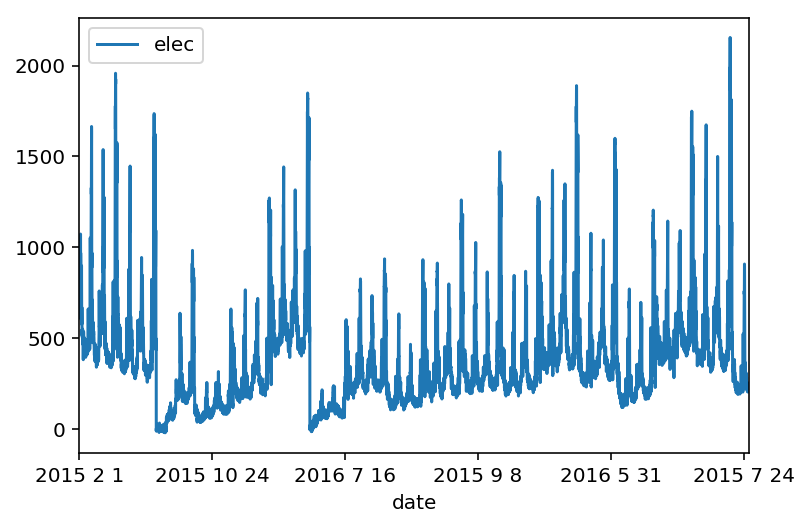

In [3]:
raw_data[:10079].plot(x='date', y='elec')

In [4]:
#One-hot encoding

dummy_fields = ['year','month','day','weekday','instance']
for each in dummy_fields:
    dummies = pd.get_dummies(raw_data[each], prefix=each, drop_first=False)
    raw_data = pd.concat([raw_data, dummies], axis=1)

fields_to_drop = ['year', 'month', 'day','date','weekday','instance']
data = raw_data.drop(fields_to_drop, axis=1)

In [5]:
#Normalization

quant_features = ['high', 'low', 'temp', 'hum', 'elec']
scaled_features = {}
for each in quant_features:
    mean, std = data[each].mean(), data[each].std()
    scaled_features[each] = [mean, std]
    data.loc[:, each] = (data[each] - mean)/std


In [6]:



# Save data for approximately the last 21 days 
test_data = data[-2600:]


# Now remove the test data from the data set 
data = data[:-2600]
#print(data)

# Separate the data into features and targets
target_fields = ['elec']

features, targets = data.drop(target_fields, axis=1), data[target_fields]
#print(features)
#print(targets)

test_features, test_targets = test_data.drop(target_fields, axis=1), test_data[target_fields]
test_features = np.array(test_features)
test_targets = np.array(test_targets)
print(test_features)
print(test_features.shape)
print(test_targets)
print(test_targets.shape)

[[-1.20135716 -0.50521521 -0.82990627 ...,  0.          0.          0.        ]
 [-1.19049785 -0.3762791  -0.78171355 ...,  0.          0.          0.        ]
 [-0.90815588 -0.32255572 -0.59858122 ...,  0.          0.          0.        ]
 ..., 
 [ 0.97050412  0.57999707  0.77284587 ...,  0.          0.          1.        ]
 [ 0.90534828  0.45106095  0.73016089 ...,  0.          0.          1.        ]
 [ 1.02480065  0.63372045  0.86234663 ...,  0.          0.          1.        ]]
(2600, 101)
[[-0.54339873]
 [-0.5075022 ]
 [-0.69111323]
 ..., 
 [-0.33143956]
 [-0.27135721]
 [-0.26577242]]
(2600, 1)


In [7]:

train_features = np.array(features)
train_targets = np.array(targets)
print(train_features)
print(train_features.shape)
print(train_targets)
print(train_targets.shape)

[[-2.07010167 -1.407768   -1.7524526  ...,  0.          0.          0.        ]
 [-1.60315149 -1.78383166 -1.64505169 ...,  0.          0.          0.        ]
 [-1.42940259 -1.14989578 -1.37241859 ...,  0.          0.          0.        ]
 ..., 
 [-0.45206502 -0.58042795 -0.46914934 ...,  0.          0.          0.        ]
 [-0.72354768 -0.09691752 -0.40305647 ...,  0.          0.          0.        ]
 [-0.79956282 -0.19361961 -0.50908045 ...,  0.          0.          0.        ]]
(23384, 101)
[[ 1.86434143]
 [ 1.28964466]
 [ 1.28561104]
 ..., 
 [-0.71537436]
 [-0.51571468]
 [-0.66345257]]
(23384, 1)


In [8]:
def DefineModel():

    ################################################################
    # Activity 2 (Network Structure):
    # Group A: uses only 1 layer
    # second_layer_width = 0
    #
    # Group B: uses 2 layers of a tower-shaped (same width) network.
    # second_layer_width = 128
    #
    # Group C: uses 2 layers of a pyramid-shaped (shrink width) network.
    # second_layer_width = 64
    ################################################################
    first_layer_width = 15
    second_layer_width = 0
    
    ################################################################
    # Activity 3 (Activation Function):
    # Group A uses ReLU.
    # activation_func = 'relu' 
    # 
    # Group B uses Sigmoid.
    # activation_func = 'sigmoid'
    #
    # Group C uses Tanh.
    # activation_func = 'tanh'
    ################################################################
    #activation_func = 'sigmoid'
    #activation_func = 'tanh'
    activation_func = 'sigmoid'

    ################################################################    
    # Activity 4 (Loss Function):
    # Group A uses cross entropy.
    # loss_function = 'categorical_crossentropy'
    # 
    # Group B uses cross entropy.
    # loss_function = 'categorical_crossentropy'
    # 
    # Group C uses squared error.
    #loss_function = 'mean_squared_error'
    ################################################################    
    loss_function = 'mean_squared_error'
    
    #################################################################    
    # Activity 5 (Dropout):
    # Group A uses 0% dropout.
    #
    # Group B uses 50% dropout.
    # dropout_rate = 0.5
    #
    # Group C uses 90% dropout.
    # dropout_rate = 0.9
    #################################################################    
    dropout_rate = 0
    
    ################################################################    
    # Activity 6 (Regularization):
    # Group A uses L1 regularizer
    #weight_regularizer = l1(0.01)
    #
    # Group B uses L2 regularizer
    #weight_regularizer = l2(0.01)
    # 
    # Group C uses no regularizer
    # weight_regularizer = None
    ################################################################
    weight_regularizer = None

    ################################################################    
    # Activity 8 (Learning Rate):
    # Group A uses learning rate of 0.1.
    # learning_rate = 0.1
    # 
    # Group B uses learning rate of 0.01.
    #learning_rate = 0.01
    #
    # Group C uses learning rate of 0.5.    
    #learning_rate = 0.5
    ################################################################
    learning_rate = 0.1
    
    ## Initialize model.
    model = Sequential()

    ## First hidden layer with 'first_layer_width' neurons. 
    ## Also need to specify input dimension.
    ## 'Dense' means fully-connected.
    model.add(Dense(first_layer_width, input_dim=101,W_regularizer=weight_regularizer))
    model.add(Activation(activation_func))
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))

    ## Second hidden layer.
    if second_layer_width > 0:
        model.add(Dense(second_layer_width))
        model.add(Activation(activation_func))
        if dropout_rate > 0:
            model.add(Dropout(dropout_rate))         
    
    ## Last layer has the same dimension as the number of classes
    model.add(Dense(1))
    ## For classification, the activation is softmax
   #model.add(Activation('sigmoid'))
    
    ## Define optimizer. In this tutorial/codelab, we select SGD.
    ## You can also use other methods, e.g., opt = RMSprop()
    opt = SGD(lr=learning_rate)
    ## Define loss function = 'categorical_crossentropy' or 'mean_squared_error'
    model.compile(loss=loss_function, optimizer=opt)

    return model

In [9]:
def TrainModel(data=None, epochs=200):
    ################################################################
    # Activity 7 (Mini-batch):
    # Group A uses mini-batch of size 128.
    # batch = 128
    #
    # Group B uses mini-batch of size 256.
    # batch = 256
    # 
    # Group C uses mini-batch of size 512.
    # batch = 512
    ################################################################
    batch=128
    start_time = time.time()
    model = DefineModel()
    if data is None:
        print("Must provide data.")
        return
    x_train, x_test, y_train, y_test = data
    print('Start training.')
    ## Use the first 55,000 (out of 60,000) samples to train, last 5,500 samples to validate.
    history = model.fit(x_train[:18200], y_train[:18200], nb_epoch=epochs, batch_size=batch,validation_data=(x_train[18200:], y_train[18200:]))

   # history = model.fit(x_train[:300], y_train[:300], nb_epoch=epochs, batch_size=batch)
    print("Training took {0} seconds.".format(time.time() - start_time))
    return model, history

In [10]:
trained_model, training_history = TrainModel(data=[train_features, test_features, train_targets, test_targets])

Start training.


/home/shaodi/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:89: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(15, input_dim=101, kernel_regularizer=None)`
/home/shaodi/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/models.py:851: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 18200 samples, validate on 5184 samples
Epoch 1/200
18200/18200 [==============================] - 0s - loss: 0.8566 - val_loss: 0.8426
Epoch 2/200
18200/18200 [==============================] - 0s - loss: 0.5618 - val_loss: 0.7656
Epoch 3/200
18200/18200 [==============================] - 0s - loss: 0.4348 - val_loss: 0.7722
Epoch 4/200
18200/18200 [==============================] - 0s - loss: 0.4019 - val_loss: 0.7876
Epoch 5/200
18200/18200 [==============================] - 0s - loss: 0.3992 - val_loss: 0.9109
Epoch 6/200
18200/18200 [==============================] - 0s - loss: 0.3886 - val_loss: 0.7616
Epoch 7/200
18200/18200 [==============================] - 0s - loss: 0.3784 - val_loss: 0.7219
Epoch 8/200
18200/18200 [==============================] - 0s - loss: 0.3519 - val_loss: 0.6936
Epoch 9/200
18200/18200 [==============================] - 0s - loss: 0.3151 - val_loss: 0.6524
Epoch 10/200
18200/18200 [==============================] - 0s - loss: 0.2742 - val_los

18200/18200 [==============================] - 0s - loss: 0.0497 - val_loss: 0.5186
Epoch 86/200
18200/18200 [==============================] - 0s - loss: 0.0478 - val_loss: 0.5003
Epoch 87/200
18200/18200 [==============================] - 0s - loss: 0.0467 - val_loss: 0.5270
Epoch 88/200
18200/18200 [==============================] - 0s - loss: 0.0491 - val_loss: 0.5035
Epoch 89/200
18200/18200 [==============================] - 0s - loss: 0.0478 - val_loss: 0.5166
Epoch 90/200
18200/18200 [==============================] - 0s - loss: 0.0459 - val_loss: 0.5425
Epoch 91/200
18200/18200 [==============================] - 0s - loss: 0.0485 - val_loss: 0.5068
Epoch 92/200
18200/18200 [==============================] - 0s - loss: 0.0455 - val_loss: 0.4970
Epoch 93/200
18200/18200 [==============================] - 0s - loss: 0.0457 - val_loss: 0.4935
Epoch 94/200
18200/18200 [==============================] - 0s - loss: 0.0463 - val_loss: 0.4961
Epoch 95/200
18200/18200 [=================